In [1]:
import pandas as pd

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Cars.csv')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    398 non-null    int64  
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
 9   name          398 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


In [2]:
DF.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
DF1 = DF[['mpg','cylinders','displacement','weight']]
DF1.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


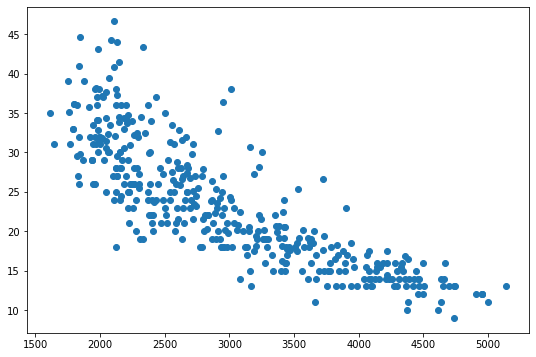

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.scatter(x=DF1.weight, y=DF1.mpg)
plt.show()

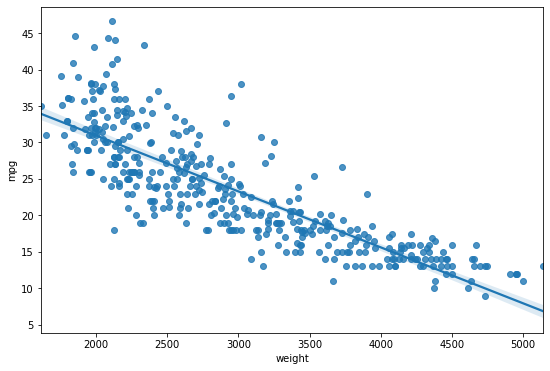

In [9]:
import seaborn as sns

fig = plt.figure(figsize=(9,6))
sns.regplot(x='weight', y='mpg', data=DF1)
plt.show()

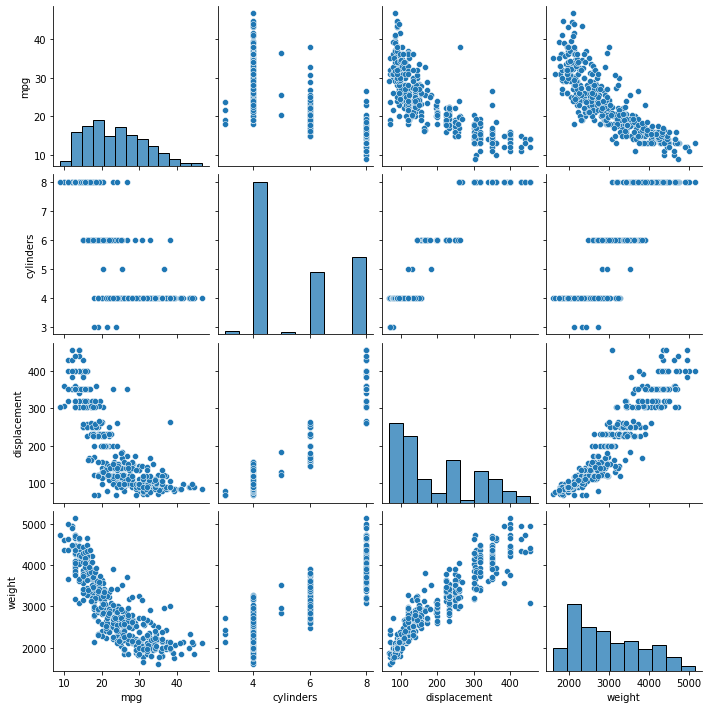

In [10]:
sns.pairplot(DF1)
plt.show()

In [11]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.weight)

(-0.8317409332443351, 2.9727995640495506e-103)

In [13]:
import numpy as np

print(np.corrcoef(DF1.mpg, DF1.weight))

[[ 1.         -0.83174093]
 [-0.83174093  1.        ]]


In [14]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.displacement)

(-0.8042028248058977, 1.655888910193157e-91)

In [15]:
import numpy as np

print(np.corrcoef(DF1.mpg, DF1.displacement))

[[ 1.         -0.80420282]
 [-0.80420282  1.        ]]


In [16]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.cylinders)

(-0.7753962854205542, 4.503992246177055e-81)

In [17]:
import numpy as np

print(np.corrcoef(DF1.mpg, DF1.cylinders))

[[ 1.         -0.77539629]
 [-0.77539629  1.        ]]


In [18]:
from sklearn.model_selection import train_test_split
X = DF1[['weight']]
y= DF1[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=2045)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(278, 1) (278, 1)
(120, 1) (120, 1)


In [19]:
from sklearn.linear_model import LinearRegression

Model = LinearRegression()
Model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print('weight(w) :', Model.coef_)
print('bias(b) : ', Model.intercept_)

weight(w) : [[-0.00766168]]
bias(b) :  [46.28223639]


In [22]:
# R score(결정계수)
Model.score(X_test, y_test)

0.7164499678296495

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, Model.predict(X_test))

17.01518447782976

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


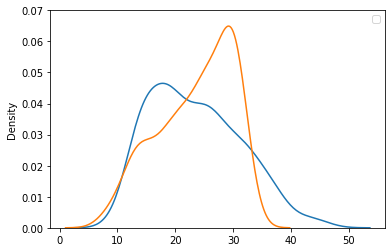

In [31]:
y_hat = Model.predict(X)

ax1 = sns.distplot(y, hist=False)
ax2 = sns.distplot(y_hat, hist=False)

plt.legend(loc='best')
plt.ylim(0, 0.07)
plt.show()

In [33]:
DF2 = DF[['weight','mpg']]
X = DF2[['weight']]
y = DF2.mpg

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2045)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(278, 1) (278,)
(120, 1) (120,)


In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2, include_bias=False)
PX2 = poly.fit_transform(X_train)

Model = LinearRegression()
Model.fit(PX2, y_train)
from sklearn.metrics import mean_squared_error
PX_ts = poly.fit_transform(X_test)
y_hat = Model.predict(PX_ts)
MSE_px_2 = mean_squared_error(y_test, y_hat)
MSE_px_2

14.848773810921921

In [37]:
# R score
Model.score(PX_ts, y_test)

0.7525521808321769

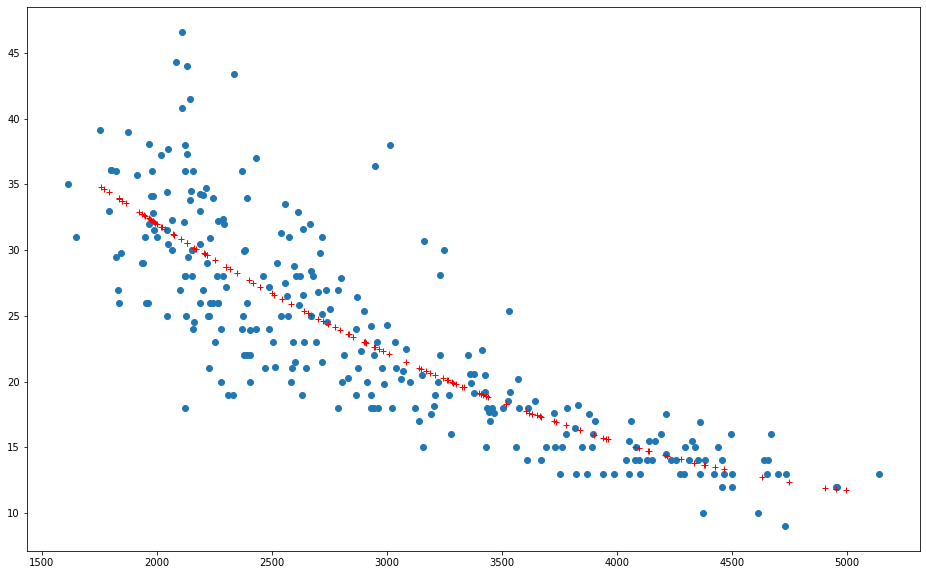

In [44]:
plt.figure(figsize=(16,10))
plt.plot(X_train, y_train, 'o')
plt.plot(X_test, y_hat, 'r+')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


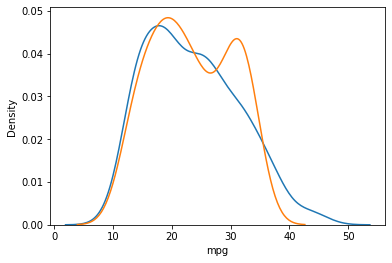

In [46]:
a = sns.distplot(y, hist=False)
b = sns.distplot(y_hat, hist=False)

In [47]:
DF3=DF[['mpg','cylinders','displacement','weight']]
DF3.head()

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


In [49]:
X = DF3[['displacement', 'weight']]
y = DF3['mpg']

# spit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2045)

# Model
Model = LinearRegression()
Model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
Model.score(X_test, y_test)


0.720971246285159

In [53]:
Model.score(X_train, y_train)

0.6881115404636289

In [54]:
mean_squared_error(y_test, Model.predict(X_test))

16.743872969214195

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


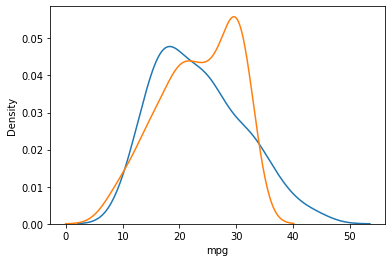

In [55]:
a = sns.distplot(y_test, hist=False)
b = sns.distplot(Model.predict(X_test), hist=False)
plt.show()

In [56]:
from scipy import stats

stats.pearsonr(DF3.displacement, DF3.weight)

(0.9328241468416343, 1.2222258725025534e-177)

In [57]:
stats.pearsonr(DF3.weight, DF3.mpg)

(-0.8317409332443351, 2.9727995640495506e-103)